In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical

In [2]:
def voted_result(filepath, n_models, n_classes):
    
    y_hat_ensemble = None
    
    for i in range(n_models):
        file = filepath.replace('#', str(i))
        y_hat = np.fromfile(file, dtype='float32').reshape(-1, n_classes)
        print(np.argmax(y_hat, axis=1))
        y_hat = to_categorical(np.argmax(y_hat, axis=1), num_classes=n_classes)
            
        if y_hat_ensemble is None:
            y_hat_ensemble = np.zeros_like(y_hat)
        y_hat_ensemble = y_hat_ensemble + y_hat
    
    y_hat_ensemble = y_hat_ensemble + np.random.normal(size=y_hat_ensemble.shape) / 1e4
    
    return np.argmax(y_hat_ensemble, axis=1)

In [31]:
y_hat_val = voted_result('./results/Model_1_#_test_cls', 10, 3)

[1 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[1 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [32]:
from matplotlib import pyplot as plt

In [33]:
y_hat_val

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
y_val = np.fromfile('./results/y_val_cls', dtype='float32').reshape(-1, 3)

In [28]:
y_val = np.argmax(y_val, axis=1)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_hat_val, y_val)

0.7702137546468402

In [62]:
y_val.astype('float32').tofile('test')

In [34]:
from matplotlib import pyplot as plt

(array([32906.,     0.,     0.,     0.,     0., 11216.,     0.,     0.,
            0.,  5878.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

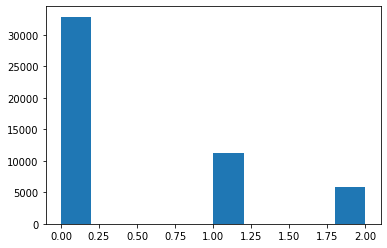

In [35]:
plt.hist(y_hat_val)

In [37]:
test_clf = np.zeros_like(y_hat_val).astype(str)

In [39]:
test_clf[y_hat_val == 0] = 'high'
test_clf[y_hat_val == 1] = 'low'
test_clf[y_hat_val == 2] = 'medium'

In [41]:
rate1 = pd.Series(test_clf)

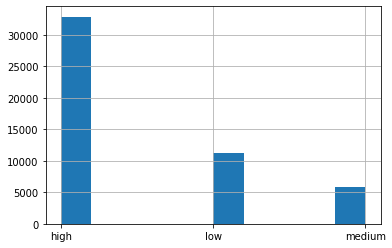

In [43]:
rate1.hist()